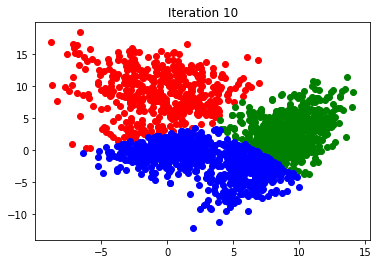

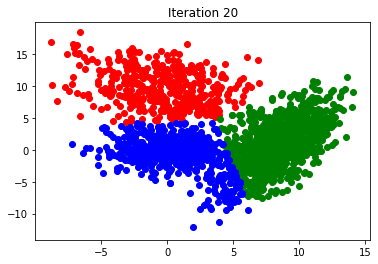

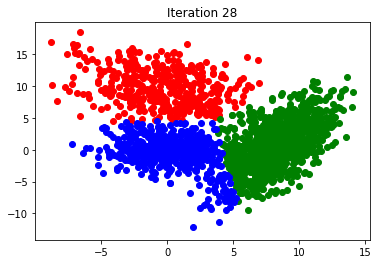

In [5]:
import scipy.io
import random
import math
import numpy as np
import matplotlib.pyplot as plt

inputs = scipy.io.loadmat('./data_hw5_2.mat')['R']

data = np.zeros((2000, 3))
data[:, :-1] = inputs

for i in range(len(data)):
    data[i][2] = random.randint(1, 3)

# Calculate the centroid of the given datapoints
def calc_centroid(group):
    c = [0, 0]
    c[0] = sum(group[:, 0]) / len(group)
    c[1] = sum(group[:, 1]) / len(group)
    return c

# Calculate euclidean distance between p1 and p2
def euclidean(p1, p2):
    return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# Group 1
group1 = data[np.where(data[:, 2] == 1)]

# Group 2
group2 = data[np.where(data[:, 2] == 2)]

# Group 3
group3 = data[np.where(data[:, 2] == 2)]


# Plot each group and its initial centroid
colors = ['r', 'g', 'b']

prev_centroids = []
counter = 0

# Loop until centroids stop changing
while True:
    counter += 1
    # List of groups
    groups = []
    for i in range(1, 4):
        groups.append(data[np.where(data[:, 2] == i)])
    
    # Get centroids of each group
    centroids = []
    for g in groups:
        centroids.append(calc_centroid(g))

    # If centroids have not updated, we're done
    if centroids == prev_centroids:
        break

    # Update groups: for each data, find the centroid it is closest to and change its group to that
    for d in data:
        min_dist = None
        for idx in range(len(centroids)):
            dist = euclidean([d[0], d[1]], centroids[idx])
            if min_dist is None:
                d[2] = idx + 1
                min_dist = dist
            elif dist < min_dist:
                d[2] = idx + 1
                min_dist = dist

    # Plot every few iterations
    if counter % 10 == 0:
        plt.figure()
        plt.title(f"Iteration {counter}")
        color = 'r'
        for g in range(len(groups)):
            plt.scatter(groups[g][:, 0], groups[g][:, 1], color=colors[g])
    
    prev_centroids = centroids

# also plot at very end
plt.figure()
plt.title(f"Iteration {counter}")
color = 'r'
for g in range(len(groups)):
    plt.scatter(groups[g][:, 0], groups[g][:, 1], color=colors[g])
